In [1]:
!pip install ultralytics

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from ultralytics import YOLO

In [3]:
# model object now gives us access to to methods like train() predict() and export()
model = YOLO("yolov8m.pt")

In [5]:
results = model.predict("cat_dog.jpg") # this can take in multiple things - paths to images, an array of path of images, also PIL lib


image 1/1 c:\Nandana\Projects\Summer 2025\yolo-detection\cat_dog.jpg: 448x640 1 cat, 1 dog, 311.7ms
Speed: 4.0ms preprocess, 311.7ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


In [6]:
result = results[0] # contains detected objects and convenient properties to work with them
bounding_boxes = len(result.boxes)
print(bounding_boxes) # 2 boxes detected - one for dog, one for cat

box = result.boxes[0]
print(box)

cords = box.xyxy[0].tolist() # boxes that are bounding the detected object
class_id = box.cls[0].item() # 
conf = box.conf[0].item()
print("Object type:", class_id) # Object type have numeric IDs - 80 object types 
print("Coordinates:", cords)
print("Probability:", conf)

2
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([16.])
conf: tensor([0.9450])
data: tensor([[261.0996,  94.0881, 460.9550, 313.6855,   0.9450,  16.0000]])
id: None
is_track: False
orig_shape: (415, 612)
shape: torch.Size([1, 6])
xywh: tensor([[361.0273, 203.8868, 199.8554, 219.5974]])
xywhn: tensor([[0.5899, 0.4913, 0.3266, 0.5292]])
xyxy: tensor([[261.0996,  94.0881, 460.9550, 313.6855]])
xyxyn: tensor([[0.4266, 0.2267, 0.7532, 0.7559]])
Object type: 16.0
Coordinates: [261.099609375, 94.0881118774414, 460.95501708984375, 313.685546875]
Probability: 0.9449876546859741


In [7]:
# Different object types
print(result.names)
print(result.names[class_id])

{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microw

In [8]:
for box in result.boxes:
  class_id = result.names[box.cls[0].item()]
  cords = box.xyxy[0].tolist()
  cords = [round(x) for x in cords]
  conf = round(box.conf[0].item(), 2)
  print("Object type:", class_id)
  print("Coordinates:", cords)
  print("Probability:", conf)
  print("---")

Object type: dog
Coordinates: [261, 94, 461, 314]
Probability: 0.94
---
Object type: cat
Coordinates: [140, 170, 256, 315]
Probability: 0.91
---


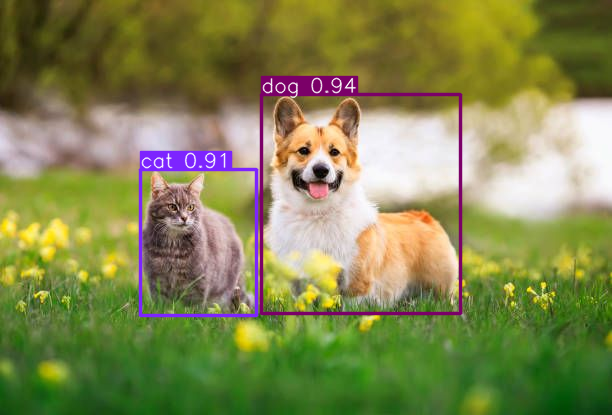

In [9]:
from PIL import Image
Image.fromarray(result.plot()[:,:,::-1])